# California housing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
housing = pd.read_csv('/home/dongsu/ML_lecture/Machine_Learning/housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# total_bedrooms : 207개의 missing values
# ocean_proximity : string
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Dealing with missing values
# 1. 해당 example 삭제
# 2. 해당 column 삭제
# 3. 다른 값으로 대체(0, 평균값, 중간값 등)

housing = housing.dropna()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20433 non-null float64
latitude              20433 non-null float64
housing_median_age    20433 non-null float64
total_rooms           20433 non-null float64
total_bedrooms        20433 non-null float64
population            20433 non-null float64
households            20433 non-null float64
median_income         20433 non-null float64
median_house_value    20433 non-null float64
ocean_proximity       20433 non-null object
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
# reset index : 0 ~ 20432
housing = housing.reset_index().drop('index', axis=1)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
longitude             20433 non-null float64
latitude              20433 non-null float64
housing_median_age    20433 non-null float64
total_rooms           20433 non-null float64
total_bedrooms        20433 non-null float64
population            20433 non-null float64
households            20433 non-null float64
median_income         20433 non-null float64
median_house_value    20433 non-null float64
ocean_proximity       20433 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# Dealing with ocean_proximity
housing.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.groupby('ocean_proximity').median_house_value.mean()

ocean_proximity
<1H OCEAN     240267.990812
INLAND        124896.863147
ISLAND        380440.000000
NEAR BAY      259279.292070
NEAR OCEAN    249042.355023
Name: median_house_value, dtype: float64

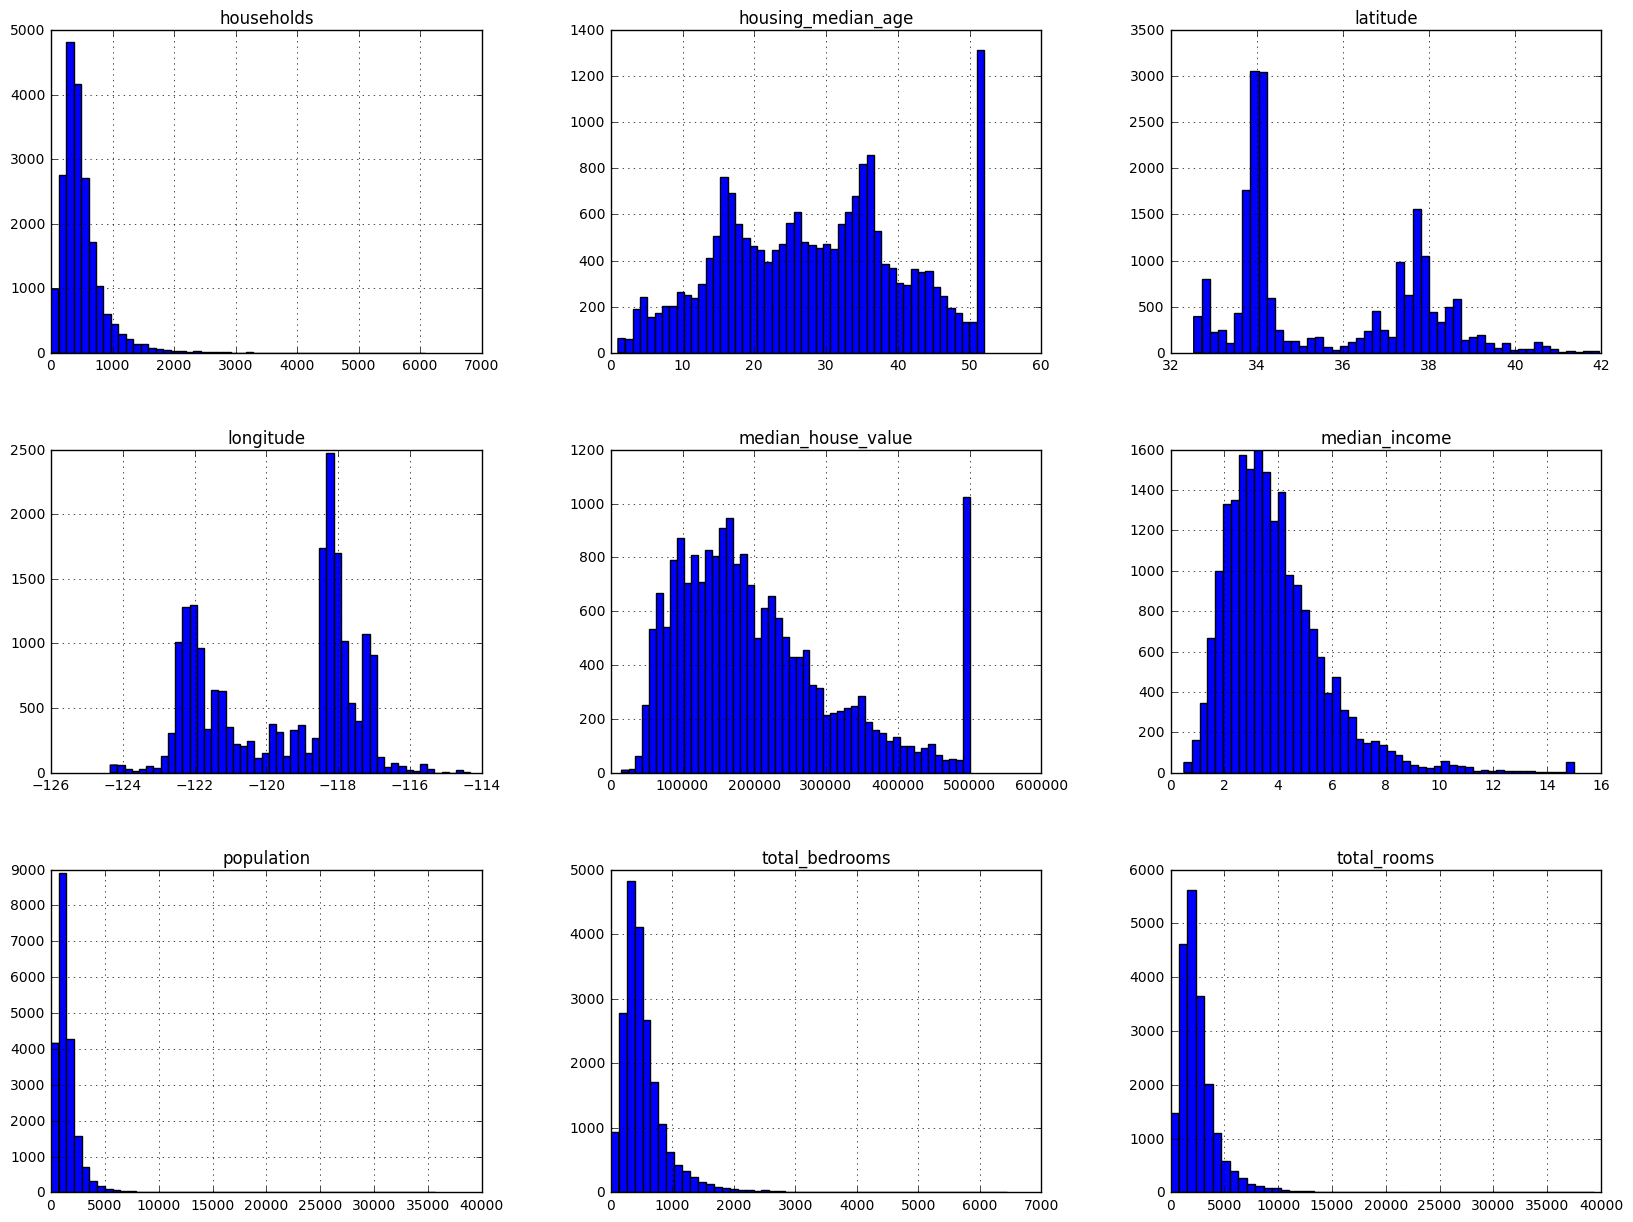

In [9]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

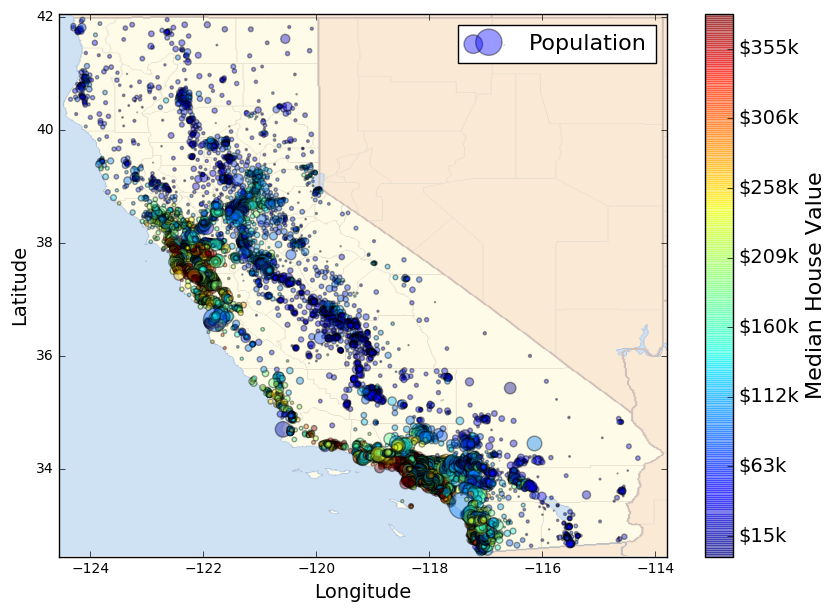

In [10]:
california_img=mpimg.imread('/home/dongsu/ML_lecture/Machine_Learning/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)
plt.legend(fontsize=16)

In [11]:
# feature 간의 상관관계
corr_matrix = housing.corr()
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64

In [12]:
# 가구당 방의 개수
housing['avg_rooms'] = housing['total_rooms']/housing['households']
# 가구당 침실의 개수
housing['avg_bedrooms'] = housing['total_bedrooms']/housing['households']
# 가구당 인구
housing['pop_household'] = housing['population']/housing['households']

In [13]:
# feature 간의 상관관계 -> avg_rooms 3전째로 높음
corr_matrix = housing.corr()
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
avg_rooms             0.151344
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
pop_household        -0.023639
population           -0.025300
longitude            -0.045398
avg_bedrooms         -0.046739
latitude             -0.144638
Name: median_house_value, dtype: float64

In [14]:
housing['NEAR BAY']=0
housing['INLAND']=0
housing['<1H OCEAN']=0
housing['ISLAND']=0
housing['NEAR OCEAN']=0

housing.loc[housing['ocean_proximity']=='NEAR BAY','NEAR BAY']=1
housing.loc[housing['ocean_proximity']=='INLAND','INLAND']=1
housing.loc[housing['ocean_proximity']=='<1H OCEAN','<1H OCEAN']=1
housing.loc[housing['ocean_proximity']=='ISLAND','ISLAND']=1
housing.loc[housing['ocean_proximity']=='NEAR OCEAN','NEAR OCEAN']=1

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_rooms,avg_bedrooms,pop_household,NEAR BAY,INLAND,<1H OCEAN,ISLAND,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556,1,0,0,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842,1,0,0,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260,1,0,0,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945,1,0,0,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467,1,0,0,0,0


In [15]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state = 10)

### 1. longitude ~ median_income (drop ocean_proximity feature)

In [16]:
train_data1 = train_set.iloc[:,:8]
train_data1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4313,-118.38,34.10,39.0,3798.0,586.0,975.0,525.0,9.3092
6773,-118.14,34.07,42.0,1036.0,199.0,656.0,215.0,4.1902
18146,-122.13,37.45,37.0,1287.0,197.0,510.0,206.0,7.9029
10877,-117.81,33.75,23.0,3498.0,636.0,1574.0,642.0,5.0210
3091,-117.66,35.60,14.0,1740.0,391.0,850.0,317.0,2.5812


In [17]:
# median_house_value (target)
train_label1 = train_set.iloc[:,8]
train_label1.head()

4313     500001.0
6773     235000.0
18146    500001.0
10877    252200.0
3091      91700.0
Name: median_house_value, dtype: float64

In [18]:
test_data1 = test_set.iloc[:,:8]
test_label1 = test_set.iloc[:,8]

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(train_data1, train_label1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
pred = lin_reg.predict(test_data1)
pred

array([ 339350.21033942,  307703.37430365,  327990.60476077, ...,
        150810.3054683 ,  402143.63905699,  183497.80286731])

In [21]:
mse = mean_squared_error(test_label1, pred)
mse

4816869944.8370638

In [22]:
print ('predicted price :', pred[300])
print ('original price :', test_label1.values[300])

predicted price : 115297.305825
original price : 75000.0


### 2. changed features

In [23]:
train_data2 = train_set.drop(['ocean_proximity','median_house_value'],axis=1)
train_label2 = train_set['median_house_value']

In [24]:
test_data2 = test_set.drop(['ocean_proximity','median_house_value'],axis=1)
test_label2 = test_set['median_house_value']

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(train_data2, train_label2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
pred = lin_reg.predict(test_data2)
pred

array([ 335507.17298535,  309486.42875614,  333784.29164461, ...,
        142660.43820628,  404555.63939017,  185178.50590724])

In [27]:
mse = mean_squared_error(test_label2, pred)
mse

4805928804.1569662

In [28]:
print ('predicted price :', pred[300])
print ('original price :', test_label2.values[300])

predicted price : 105453.494474
original price : 75000.0


### 3. scaling

In [29]:
housing.describe() # 나중에 feature scaling

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_rooms,avg_bedrooms,pop_household,NEAR BAY,INLAND,<1H OCEAN,ISLAND,NEAR OCEAN
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,5.431344,1.097062,3.071533,0.111095,0.317917,0.442128,0.000245,0.128615
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,2.482946,0.476104,10.438269,0.314257,0.465678,0.496652,0.015641,0.334782
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.333333,0.692308,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,4.441441,1.006029,2.429032,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,5.230769,1.048889,2.817582,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,6.052381,1.099631,3.281513,0.000000,1.000000,1.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,34.066667,1243.333333,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
scaler = StandardScaler()
scaled = scaler.fit_transform(housing.drop(['ocean_proximity','median_house_value'], axis=1))

In [31]:
train_set.index.values

array([ 4313,  6773, 18146, ..., 17728,  7293, 17673])

In [32]:
test_set.index.values

array([18082,  3568,  8478, ..., 13393,   126,  7424])

In [33]:
scaled_train = scaled[train_set.index.values,:]
scaled_test = scaled[test_set.index.values,:]

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(scaled_train, train_label2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
pred = lin_reg.predict(scaled_test)
pred

array([ 335513.55016365,  309493.11266365,  333790.92516365, ...,
        142667.05016365,  404561.55016365,  185185.55016365])

In [36]:
mse = mean_squared_error(test_label2, pred)
mse

4805940411.9443703

In [37]:
print ('predicted price :', pred[300])
print ('original price :', test_label2.values[300])

predicted price : 105460.487664
original price : 75000.0
